# Workbook for (hopefully) simulating holograms
(Created by George Lewis, based on code written by James Loudon and Sam Holt)

## Package import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas                           # for reading data from file
from scipy import constants             # for scientific constants
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting
import holosim

# to fully print numpy arrays
import sys
np.set_printoptions(threshold=sys.maxsize)

## Magnetisation input
- First stage is to import or generate data. 
- Data should be an array where each row contains [$x, y, z, m_x, m_y, m_z$]. 
- This should then be organised so that 'coor' is an $n\times3$ array of [$x,y,z$] positions, with 'm_x', 'm_y' and 'm_z' each being an array of magnetisation data. 
- The extent of this data should cover the full region of interest (sample + space).

### Load from file

In [ ]:
folder = r'C:\Users\grl31\Documents\MERRILL\merrill-1.3.3-Windows-x86_64\size_loop_0mt'
fname = 'hyst_001_300.dat'
fpath = folder + '\\' + fname

# 'fixed width formatted' works directly with even .dat format
data = pandas.read_fwf(fpath, header = None)

all_x = np.take(data,0,axis=1)
all_y = np.take(data,1,axis=1)
all_z = np.take(data,2,axis=1)

coor = np.array([all_x,all_y,all_z]).T
m_x = np.take(data,3,axis=1)
m_y = np.take(data,4,axis=1)
m_z = np.take(data,5,axis=1)

### Generate datasets

#### Create coordinate space

In [214]:
# Generate x,y,z value
n = 100
xs = np.linspace(-n/2,n/2,n)
ys = np.linspace(-n/2,n/2,n)
zs = np.linspace(-n/2,n/2,n)
xx, yy, zz = np.meshgrid(xs,ys, zs,indexing='ij')
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

#### Bar magnet

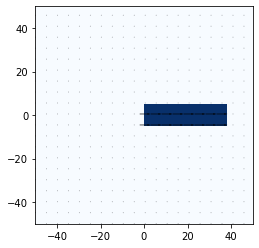

In [305]:
Mx = np.zeros_like(xs)
My = np.zeros_like(ys)
Mz = np.zeros_like(zs)

Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz, indexing='ij')

Mxx[round(2*n/4):round(3.5*n/4),round(9*n/20):round(11*n/20),round(9*n/20):round(11*n/20)] = 1
#Myy[round(n/4):round(3*n/4),round(n/4):round(3*n/4),round(n/4):round(3*n/4)] = 1

# plot
# in this case plot the Mx values as slice z= 50 
%matplotlib inline
s=5
plt.quiver(xx[::s,::s,round(n/2)],yy[::s,::s,round(n/2)],Mxx[::s,::s,round(n/2)],Myy[::s,::s,round(n/2)],pivot='mid',scale=20)
plt.imshow(Mxx[:,:,round(n/2)].T, extent=[-n/2,n/2,-n/2,n/2],cmap='Blues')

#### Ring

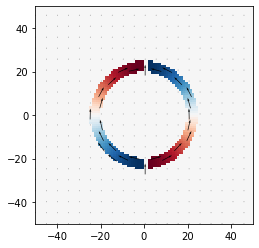

In [7]:
data = []
for x in xs:
    for y in ys:
        for z in zs:
            if x**2 + y**2 < (n/4)**2 and x**2 + y**2 > (n/5)**2 and z <n/4 and z>-n/4:
                mx, my = holosim.onion(x,y) #holosim.vortex(x,y) #1,1
                m = [mx,my,0]
                data.append([x,y,z,m[0],m[1],m[2]])
            else:
                m = [0,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])

Mxx = np.take(data,3,axis=1)
Myy = np.take(data,4,axis=1)
Mzz = np.take(data,5,axis=1)

Mxx = Mxx.reshape(len(xs),len(ys),len(zs))
Myy = Myy.reshape(len(xs),len(ys),len(zs))
Mzz = Mzz.reshape(len(xs),len(ys),len(zs))

# plot
# in this case plot the Mx values as slice z= 50 
%matplotlib inline
s=5
plt.quiver(xx[::s,::s,round(n/2)],yy[::s,::s,round(n/2)],Mxx[::s,::s,round(n/2)],Myy[::s,::s,round(n/2)],pivot='mid',scale=20)
plt.imshow(Mxx[:,:,round(n/2)].T, extent=[-n/2,n/2,-n/2,n/2],cmap='RdBu',vmin=-1,vmax=1)

#### Triangular prism

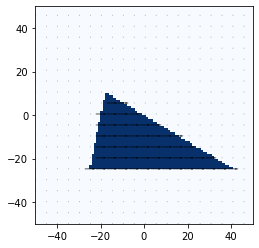

In [306]:
# Define gradient/intercept of bounding lines
m1, c1 = 5, 100
m2, c2 = 0, -25
m3, c3 = -0.6, 0

data = []
for x in xs:
    for y in ys:
        for z in zs:
            if y < (m1*x+c1) and y > (m2*x + c2) and y < (m3*x + c3) and z >-10 and z<40:
                m = [1,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])
            else:
                m = [0,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])
                
Mxx = np.take(data,3,axis=1)
Myy = np.take(data,4,axis=1)
Mzz = np.take(data,5,axis=1)

Mxx = Mxx.reshape(len(xs),len(ys),len(zs))
Myy = Myy.reshape(len(xs),len(ys),len(zs))
Mzz = Mzz.reshape(len(xs),len(ys),len(zs))

# plot
# in this case plot the Mx values as slice z= 50 
%matplotlib inline
s=5
plt.quiver(xx[::s,::s,round(n/2)],yy[::s,::s,round(n/2)],Mxx[::s,::s,round(n/2)],Myy[::s,::s,round(n/2)],pivot='mid',scale=20)
plt.imshow(np.flipud(Mxx[:,:,round(n/2)].T), extent=[-n/2,n/2,-n/2,n/2],cmap='Blues',vmin=0,vmax=1)

#### Extract magnetisation and projected magnetisation

In [307]:
m_x, m_y, m_z = Mxx, Myy, Mzz
MX, MY, MZ = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2)
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

## Reshape/homogonise data

In [311]:
# Array with unique z coordinates
xuni = np.unique(coor[:,0])
yuni = np.unique(coor[:,1])
zuni = np.unique(coor[:,2])

# Length of each dimension
x_len = len(xuni)
y_len = len(yuni)
z_len = len(zuni)

# Generate mesh
X, Y, Z = np.meshgrid(xuni, yuni, zuni, indexing='ij')

x_proj = np.average(X,axis=2)
y_proj = np.average(Y,axis=2)

# Calculate grid spacing
x_res = (xuni[1]-xuni[0])
y_res = (yuni[1]-yuni[0])
z_res = (yuni[1]-yuni[0])

# Limits of grid
x_begin = xuni[0] - 0.5*x_res
x_end = xuni[-1] + 0.5*x_res
y_begin = yuni[0] - 0.5*y_res
y_end = yuni[-1] + 0.5*y_res
z_begin = zuni[0] - 0.5*z_res
z_end = zuni[-1] + 0.5*z_res

# Calculate size of grid
x_size = (x_end-x_begin)
y_size = (y_end-y_begin)
z_size = (z_end-z_begin)

# Confirm the dimensions of the image and resolution for the user.
sym_details = 'The data imported has dimensions ' + str(x_size) + ' x ' + str(y_size) + ' x ' + str(z_size) + ' nm,\n'
sym_details += 'and resolution ' + str(x_res) + ' x ' + str(y_res) + ' x ' + str(z_res) + ' nm.\n'
sym_details += 'There are a total of ' + str(z_len) + ' slices in z.'
print(sym_details)

The data imported has dimensions 101.01010101 x 101.01010101 x 101.01010101 nm,
and resolution 1.0101010101 x 1.0101010101 x 1.0101010101 nm.
There are a total of 100 slices in z.


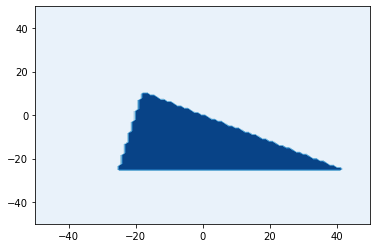

In [6]:
# contour plot of projected x magnetisation
%matplotlib qt5
plt.contourf(x_proj,y_proj,ave_m_x,cmap='Blues')

## Rotate data method 1
- Apply rotation matrix about axis as described here 
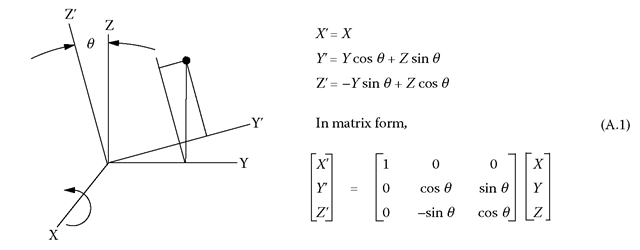

In [211]:
# Choose angle
# define in degrees, clockwise from +ve z if facing in +ve x direction
def rotation3d(X,Y,Z,MX,MY,MZ, angle,rot_ax):
    theta = angle * 2*np.pi/360

    rot_dat = []
    n = 100

    # Flatten data
    Xflat = X.reshape(n**3)
    Yflat = Y.reshape(n**3)
    Zflat = Z.reshape(n**3)
    MXflat = MX.reshape(n**3)
    MYflat = MY.reshape(n**3)
    MZflat = MZ.reshape(n**3)
    
    C = np.cos(theta)
    S = np.sin(theta)
    
    if rot_ax=='x':
        # Apply transformation to flattened data
        for i, xx in enumerate(Xflat):
            # extract data
            x0,y0,z0 = xx, Yflat[i], Zflat[i]
            mx, my, mz = MXflat[i], MYflat[i], MZflat[i]

            # apply transformation to coordinates
            xr = x0
            yr = C*y0 - S*z0
            zr = S*y0 + C*z0

            # apply transformation to magnetisation vectors
            mxr = mx
            myr = C*my - S*mz
            mzr = S*my + C*mz
            rot_dat.append([xr,yr,zr,mxr,myr,mzr])
            
    if rot_ax=='y':
        # Apply transformation to flattened data
        for i, yy in enumerate(Yflat):
            # extract data
            x0,y0,z0 = Xflat[i], yy, Zflat[i]
            mx, my, mz = MXflat[i], MYflat[i], MZflat[i]

            # apply transformation to coordinates
            xr = C*x0 + S*z0
            yr = y0
            zr = -S*x0 + C*z0

            # apply transformation to magnetisation vectors
            mxr = C*mx + S*mz
            myr = my
            mzr = -S*mx + C*mz
            rot_dat.append([xr,yr,zr,mxr,myr,mzr])
    
    elif rot_ax=='z':
        # Apply transformation to flattened data
        for i, zz in enumerate(Zflat):
            # extract data
            x0,y0,z0 = Xflat[i], Yflat[i], zz
            mx, my, mz = MXflat[i], MYflat[i], MZflat[i]

            # apply transformation to coordinates
            xr = C*x0 - S*y0
            yr = S*x0 + C*y0
            zr = z0

            # apply transformation to magnetisation vectors
            mxr = C*mx - S*my
            myr = S*mx +C*my
            mzr = mz
            rot_dat.append([xr,yr,zr,mxr,myr,mzr])
        

    # Extract rotated data
    xrs = np.take(rot_dat,0,axis=1)
    yrs = np.take(rot_dat,1,axis=1)
    zrs = np.take(rot_dat,2,axis=1)
    mxrs = np.take(rot_dat,3,axis=1)
    myrs = np.take(rot_dat,4,axis=1)
    mzrs = np.take(rot_dat,5,axis=1)

    # Reshape rotated data
    Xr,Yr,Zr = xrs.reshape(n,n,n),yrs.reshape(n,n,n),zrs.reshape(n,n,n)
    MXr,MYr,MZr = mxrs.reshape(n,n,n),myrs.reshape(n,n,n),mzrs.reshape(n,n,n)
    return Xr,Yr,Zr,MXr,MYr,MZr

In [210]:
    # Calculate rotation matrix
    ax,ay,az = 0,-90,0
    ax = ax * np.pi/180
    Cx = np.cos(ax)
    Sx = np.sin(ax)
    Cx = Cx/np.hypot(Cx,Sx) # normalise
    Sx = Sx/np.hypot(Cx,Sx)
    mrotx = np.array([[1,0,0],[0,Cx,-Sx],[0,Sx,Cx]])
    
    ay = ay * np.pi/180
    Cy = np.cos(ay)
    Sy = np.sin(ay)
    Cy = Cy/np.hypot(Cy,Sy)
    Sy = Sy/np.hypot(Cy,Sy)
    mroty = np.array([[Cy,0,Sy],[0,1,0],[-Sy,0,Cy]])
    
    az = az * np.pi/180
    Cz = np.cos(az)
    Sz = np.sin(az)
    Cz = Cz/np.hypot(Cz,Sz)
    Sz = Sz/np.hypot(Cz,Sz)
    mrotz = np.array([[Cz,-Sz,0],[Sz,Cz,0],[0,0,1]])
    
    mrot = mrotx.dot(mroty).dot(mrotz)
    
    x = np.array([1,0,0])
    X = mrot.dot(x)
    X

array([  6.12323400e-17,   0.00000000e+00,   1.00000000e+00])

In [221]:
print(np.shape(X))
angle = 0
Xr,Yr,Zr,MXr,MYr,MZr = rotation3d(X,Y,Z,MX,MY,MZ, angle,'x')

angle = 90
Xr,Yr,Zr,MXr,MYr,MZr = rotation3d(Xr,Yr,Zr,MXr,MYr,MZr, angle,'y')

angle = 0
Xr,Yr,Zr,MXr,MYr,MZr = rotation3d(Xr,Yr,Zr,MXr,MYr,MZr, angle,'z')

(100, 100, 100)


In [222]:
# 3D plot rotated data
%matplotlib qt5
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
size = 4

rot_switch=True
if rot_switch == True:
    a, b, c, f, g, h = Xr, Yr, Zr, MXr, MYr, MZr
else:
    a, b, c, f, g, h = X, Y, Z, MX, MY, MZ

ax.quiver(a[::s,::s,::s], b[::s,::s,::s], c[::s,::s,::s], f[::s,::s,::s], g[::s,::s,::s], h[::s,::s,::s],length = size)
ax.set_xlim([-50,50])
ax.set_ylim([-50,50])
ax.set_zlim3d([-50,50])
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.set_title('Rotated %i degrees about x' % angle)

ele = 90#-90 -45# elevation angle in z plane 
azm = -90#-90 +180# azimuthal angle in xy plane

ax.view_init(elev=ele, azim=azm)

(-50, 50)

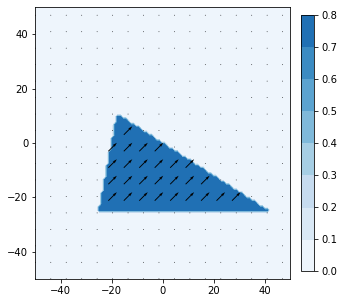

In [43]:
rot_switch=False
if rot_switch == True:
    a, b, c, f, g, h = Xr, Yr, Zr, MXr, MYr, MZr
#     mx_proj = np.flipud(np.mean(f,axis=0))
#     my_proj = np.flipud(np.mean(g,axis=0))
#     x_proj = np.mean(a,axis=0).T
#     y_proj = np.flipud(np.mean(b,axis=0).T)
else:
    a, b, c, f, g, h = X, Y, Z, MX, MY, MZ
    mx_proj = np.mean(f,axis=2)
    my_proj = np.mean(g,axis=2)
    x_proj = np.mean(a,axis=2)
    y_proj = np.mean(b,axis=2)

mx_proj = np.mean(f,axis=2)
my_proj = np.mean(g,axis=2)
x_proj = np.mean(a,axis=2)
y_proj = np.mean(b,axis=2)



s=6
%matplotlib inline
fig = plt.figure(figsize=(5,5))
pos = plt.contourf(x_proj,y_proj,np.hypot(mx_proj,my_proj),cmap='Blues',extent=[-50,50,-50,50], vmin=0, vmax=1)
plt.quiver(x_proj[::s,::s], y_proj[::s,::s], mx_proj[::s,::s], my_proj[::s,::s], scale=15, pivot='mid')
#pos = plt.imshow(np.hypot(mx_proj,my_proj),extent=extent,cmap='Blues',origin='lower', vmin=0, vmax=1)
#plt.scatter(x_proj,y_proj,np.hypot(mx_proj,my_proj), vmin=0, vmax=1)

clb = fig.colorbar(pos,fraction=0.046, pad=0.04)
plt.ylim([-50,50])
plt.xlim([-50,50])

## Rotation method 2 (astra)

In [7]:
# Define projection functions 

from astra import create_proj_geom, create_vol_geom, create_projector, OpTomo
from scipy.sparse.linalg import LinearOperator

def getGeneralProjGeometry(det, beam, e1, e2):
    # beam direction = beam[i]
    # first axis detector is e1[i] (size det[0])
    # second axis detector is e2[i] (size det[1])
    V = np.hstack((beam, np.zeros((len(beam),3)), e2, e1))
    #return create_proj_geom('parallel3d', 1,1,*det, [180,0,0])
    return create_proj_geom('parallel3d_vec', *det, V)

def getGeneralVolGeometry(sz):
    return create_vol_geom(sz[1], sz[2], sz[0])

def getGeneralProjector(sz, det, beam, e1, e2):
    vol = getGeneralVolGeometry(sz)
    proj = getGeneralProjGeometry(det, beam, e1, e2)
    ID = create_projector('cuda3d', proj, vol)
    return OpTomo(ID)

class vectorProjector(LinearOperator):

    def __init__(self, proj, dom, ran, vsize=None):
        dim = 3 if proj.appendString[:1] == '3' else 2
        if vsize is None:
            vsize = max(np.prod(dom[dim:]), np.prod(ran[dim:]))
        LinearOperator.__init__(self, 'float32', (vsize * np.prod(ran[:dim]), vsize * np.prod(dom[:dim])))
        self.proj = proj
        self.dim = dim
        self.dom, self.ran = dom, ran
        self._transpose = self._adjoint

    def FP(self, u):
        u = u.reshape(*self.dom[:self.dim], -1)
        v = [self.proj.FP(u[..., i])[..., None]
             for i in range(u.shape[-1])]
        return np.concatenate(v, axis=-1).reshape(self.ran)

    def BP(self, u):
        u = u.reshape(*self.ran[:self.dim], -1)
        v = [self.proj.BP(u[..., i])[..., None]
             for i in range(u.shape[-1])]
        return np.concatenate(v, axis=-1).reshape(self.dom)
    
    _matvec, _rmatvec = FP, BP

class tensorProjector(LinearOperator):

    def __init__(self, proj, dom, ran, beam):
        P = vectorProjector(proj, dom, ran)
        LinearOperator.__init__(self, 'float32', P.shape)
        self.proj = P
        self.beam = beam
        self._transpose = self._adjoint

    def FP(self, u): return self.proj.FP(u)

    def BP(self, u): return self.proj.BP(u)

    def norm(self): return self.proj.norm()

    _matvec, _rmatvec = FP, BP


def getVecProj(sz, det, beam, e1, e2, size=(1,)):
    size = tuple(size) if hasattr(size, '__iter__') else (size,)
    proj = getGeneralProjector(sz, det, beam, e1, e2)
    dom = tuple(sz) + size
    ran = (det[0], len(beam), det[1]) + size
    # changed this to vector projector
    return tensorProjector(proj, dom, ran, beam)

In [377]:
# define projection function which uses astra code above

def rotation_projection(MX,MY,MZ, ax=0,ay=0,az=0):
    """ Given 3D gridded magnetisation values MX,MY,MZ, returns x,y,z magnetisation 
    values projected in 2D.
    By default projects for beam parallel to z axis, but this can be modified by changing
    angles ax/ay/az to project as if the sample had been rotated about the x/y/z axes by 
    the amounts specified"""
    sz, det = (100, 100, 100), (100, 100)
    
    # Calculate rotation matrix
    ax = ax * np.pi/180
    Cx = np.cos(ax)
    Sx = np.sin(ax)
    #Cx = Cx/np.hypot(Cx,Sx) # normalise
    #Sx = Sx/np.hypot(Cx,Sx)
    mrotx = np.array([[1,0,0],[0,Cx,-Sx],[0,Sx,Cx]])
    
    ay = ay * np.pi/180
    Cy = np.cos(ay)
    Sy = np.sin(ay)
    #Cy = Cy/np.hypot(Cy,Sy)
    #Sy = Sy/np.hypot(Cy,Sy)
    mroty = np.array([[Cy,0,Sy],[0,1,0],[-Sy,0,Cy]])
    
    az = az * np.pi/180
    Cz = np.cos(az)
    Sz = np.sin(az)
    #Cz = Cz/np.hypot(Cz,Sz)
    #Sz = Sz/np.hypot(Cz,Sz)
    mrotz = np.array([[Cz,-Sz,0],[Sz,Cz,0],[0,0,1]])
    
    mrot = mrotx.dot(mroty).dot(mrotz)
    beam = mrot.dot(np.array([0,0,1]))
    beam = np.array([[beam[2],beam[1],beam[0]],[0,0,0]])
    # pass rotation matrix into astra beam/detector configuration
    #beam = np.array([[mrot[2][2],mrot[2][1],mrot[2][0]],[0,0,0]]) # z
    e1 = np.array([[mrot[1][2],mrot[1][1],mrot[1][0]],[0,0,0]]) # y
    e2 = np.array([[mrot[0][2],mrot[0][1],mrot[0][0]],[0,0,0]]) # x
    
    # reshape x,y,z magnetisation into u
    u = np.concatenate([thing.reshape(*thing.shape[:3],1) for thing in (MX, MY, MZ)], axis=3)

    # Project data along given axis
    R = getVecProj(u.shape[:3], det, beam, e1, e2, 3)
    Ru = R.FP(u)
    
    # extract projected m vectors
    mxf = Ru[:,0,:,0].reshape(100**2)
    myf = Ru[:,0,:,1].reshape(100**2)
    mzf = Ru[:,0,:,2].reshape(100**2)

    Ms = np.array([mxf,myf,mzf])

    Msr = []
    #print(Ms[1][4987])
    # rotate vectors by specified amount
    for i in range(100**2):
        x, y, z = Ms[0][i],Ms[1][i],Ms[2][i]

        res = mrot.dot(np.array([x,y,z])) 
        xr,yr,zr = res[0], res[1], res[2]  #C*x - S*y, S*x + C*y,            z
        Msr.append([xr,yr,zr])

    # extract final result
    Msr = np.array(Msr)
    Mxr = np.take(Msr,0,axis=1)
    Myr = np.take(Msr,1,axis=1)
    Mzr = np.take(Msr,2,axis=1)

    Mxr = Mxr.reshape(100,100)/100
    Myr = Myr.reshape(100,100)/100
    Mzr = Mzr.reshape(100,100)/100
    
    Mxr = Mxr.T
    Myr = Myr.T
    Mzr = Mzr.T

    return Mxr, Myr, Mzr

Mxr, Myr, Mzr = rotation_projection(MX,MY,MZ,ax=theta_x,ay=theta_y, az=theta_z)


In [384]:
# plot rotated magnetic components
%matplotlib qt
%matplotlib qt

# ele = 90 + 45
# azm = -90
# ele = ele * 2*np.pi/360
# azm = azm * 2*np.pi/360

# theta_x = np.round(np.arccos(np.cos(ele)*np.sin(azm)) * 360 / (2*np.pi) - 90, decimals=2)
# theta_y = np.round(np.arcsin(np.sin(ele)*np.sin(azm)) * 360 / (2*np.pi) + 90, decimals=2)
# theta_z = np.round(azm * 360 / (2*np.pi) + 90, decimals=2)

theta_x, theta_y, theta_z = 90, 0, 90
Mxr, Myr, Mzr = rotation_projection(MX,MY,MZ,ax=theta_x,ay=theta_y, az=theta_z)

# Set up figure
fig = plt.figure(figsize=(16, 12))
grid = plt.GridSpec(3, 4)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[2, 0])
ax4 = fig.add_subplot(grid[:, 1:])

# plot Mx
pos =  ax1.imshow(np.flipud(Mxr.T), vmin=-1,vmax=1, extent=[x_begin, x_end, y_begin, y_end],cmap='RdBu'); 
ax1.set_title('Mx',fontsize=16); ax1.set_xlabel('x',fontsize=14);ax1.set_ylabel('y',fontsize=14); fig.colorbar(pos,ax=ax1,fraction=0.046, pad=0.04)

# Plot My
pos = ax2.imshow(np.flipud(Myr.T), vmin=-1,vmax=1,extent=[x_begin, x_end, y_begin, y_end],cmap='RdBu');
ax2.set_title('My',fontsize=16); ax2.set_xlabel('x',fontsize=14);ax2.set_ylabel('y',fontsize=14); fig.colorbar(pos,ax=ax2,fraction=0.046, pad=0.04)

#Plot Mz
pos = ax3.imshow(np.flipud(Mzr.T), vmin=-1,vmax=1,extent=[x_begin, x_end, y_begin, y_end],cmap='RdBu');
#pos = ax3.contourf(x_proj,y_proj,Mzr,cmap='RdBu',vmin=-1,vmax=1)
ax3.set_title('Mz',fontsize=16); ax3.set_xlabel('x',fontsize=14);ax3.set_ylabel('y',fontsize=14); fig.colorbar(pos,ax=ax3,fraction=0.046, pad=0.04)

# Plot projection
s=5
size = 0.1
mag_B = np.hypot(Mxr,Myr)

    # M magnitude plot
pos = ax4.imshow(np.flipud(mag_B.T),extent=[x_begin, x_end, y_begin, y_end],cmap='Blues', vmin=0,vmax=1)
#pos = ax4.contourf(x_proj,y_proj,mag_B,cmap='Blues', vmin=0,vmax=1)
clb = fig.colorbar(pos,ax=ax4,fraction=0.046, pad=0.04)
clb.ax.set_title(r'|$\bf{M}$$_\perp$|')

    # Vector plot
ax4.quiver(x_proj[::s,::s],y_proj[::s,::s],Mxr[::s,::s],Myr[::s,::s],scale = 1/size, pivot='mid')
ax4.set_title(r'$\bf{M}$$_\perp$ for %i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$ rotations about x, y and z' % (theta_x, theta_y, theta_z), fontsize=25); ax4.set_xlabel('x',fontsize=16);ax4.set_ylabel('y',fontsize=16); 

plt.tight_layout()

## Rotation attempt 3

In [19]:
from scipy.ndimage import rotate as rotate

pos = np.array([X,Y,Z])
# rotate around z
posr = rotate(pos,30,axes=(1,2))

mags = np.array([MX,MY,MZ])
# rotate aroudn z
magsr = rotate(pos,30,axes=(1,2))

# def rotate_3d(data,angle):
#     """ Rotate 3D dataset about the x axis, give angle in degrees """
#     # Define shape of output
#     data_rot = np.zeros((data.shape[0], data.shape[1], data.shape[2]))
    
#     # Rotate each slice individually about x axis
#     for i in range(data.shape[0]):
#         # Rotate
#         s = data[i,:,:]
#         srot = rotate(s,angle)
        
#         # Crop back to original size
#         midpoint = srot.shape[0]/2
#         srot_crop = srot[round(midpoint-data.shape[1]/2):round(midpoint+data.shape[1]/2),
#                          round(midpoint-data.shape[2]/2):round(midpoint+data.shape[2]/2)]
        
#         # Store
#         data_rot[i,:,:] = srot_crop
    
#     return data_rot

In [37]:

Xr, Yr, Zr = posr[0], posr[1], posr[2]
Mxr, Myr, Mzr = magsr[0], magsr[1], magsr[2]

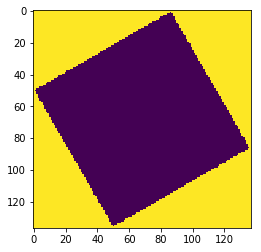

In [45]:
plt.imshow(Mzr[:,:,0])

In [25]:
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s =3
size = 3

rot_switch = False

if rot_switch == True:
    a = Xr
    b = Yr
    c = Zr

    f = Mxr
    g = Myr
    h = Mzr
else:
    a = X
    b = Y
    c = Z

    f = Mx
    g = My
    h = Mz

ax.quiver(a[::s,::s,::s], b[::s,::s,::s], c[::s,::s,::s], f[::s,::s,::s], g[::s,::s,::s], h[::s,::s,::s],length = size,alpha=0.2,linewidth=2)
lim = 25
plt.xlim([-lim,lim])
plt.ylim([-lim,lim])
ax.set_zlim3d([-lim,lim])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
angle = 30
plt.title(r'$\bf{M}$ (rotated %i degrees about x)' % angle, fontsize = 16)

Text(0.5, 0.92, '$\\bf{M}$ (rotated 30 degrees about x)')

## Plot input data

In [223]:
# Unrotated dataset
a = X
b = Y
c = Z
d = ave_m_x
e = ave_m_y
f = MX
g = MY
h = MZ
i = x_proj
j = y_proj
angle = 0

# Rotated dataset
# a = Xr
# b = Yr
# c = Zr
# d = ave_m_x_r.T # Transpose is necessary but not sure why...
# e = ave_m_y_r.T
# f = MXr
# g = MYr
# h = MZr
# i = x_projr
# j = y_projr
# angle = theta*360*0.5/np.pi

### Plot M projected in z

/home/grl31/anaconda3/envs/astraenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Attempting to set identical bottom == top == -50.0 results in singular transformations; automatically expanding.
  if __name__ == '__main__':


Text(0.5, 1.0, '$\\bf{M}$$_{\\perp}$ (rotated 0 degrees about x)')

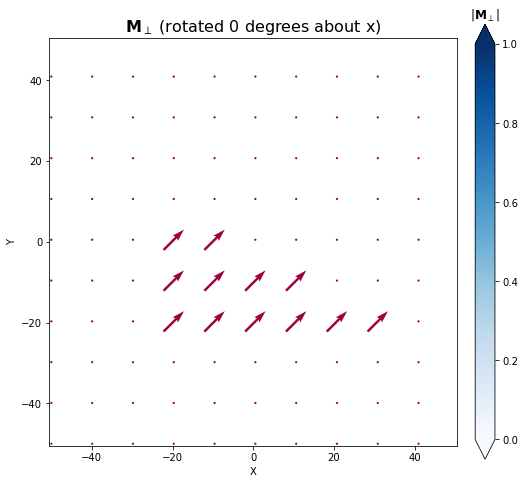

In [17]:
# Skip step and arrow size
s = 10
size = 0.1

f, ax = plt.subplots(ncols=1, figsize=(8, 8))

# Generate colormap based on magnitude of B field
mag_B = (d**2 + e**2)**0.5#np.hypot(mx_avgr,my_avgr)
pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, min(i[0,:]), max(i[0,:])], vmin=0, vmax=1,interpolation='spline16', cmap='Blues')
clb = f.colorbar(pos,fraction=0.046, pad=0.04,extend='both')
clb.ax.set_title(r'|$\bf{M}$$_\perp$|')

# Plot projected M vectors
plt.quiver(i[::s,::s],j[::s,::s],d[::s,::s],e[::s,::s],mag_B,scale=1/size,cmap='Spectral',pivot='mid')

plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([x_begin,x_end])
plt.title(r'$\bf{M}$$_{\perp}$ (rotated %i degrees about x)' % angle, fontsize=16)

### Plot M in 3D

In [373]:
# Use different rotation code which can be plotted in 3D but not projected....
# Xr,Yr,Zr,MXr,MYr,MZr = rotation3d(X,Y,Z,MX,MY,MZ, theta_x,'x')
# Xr,Yr,Zr,MXr,MYr,MZr = rotation3d(Xr,Yr,Zr,MXr,MYr,MZr, theta_y,'y')
# Xr,Yr,Zr,MXr,MYr,MZr = rotation3d(Xr,Yr,Zr,MXr,MYr,MZr, theta_z,'z')

#Xr, Yr, Zr = np.flipud()


a, b, c, d, e, f = X,Y,Z,MX,MY,MZ

# Plot M vectors in 3D
%matplotlib qt
%matplotlib qt
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
s = 5
size = 3

ax.quiver(a[::s,::s,::s], b[::s,::s,::s], c[::s,::s,::s], d[::s,::s,::s], e[::s,::s,::s], f[::s,::s,::s],length = size,alpha=0.5,linewidth=3,color='k')

# Calculate rotation matrix
theta_x = theta_x * np.pi/180
Cx = np.cos(theta_x)
Sx = np.sin(theta_x)
#Cx = Cx/np.hypot(Cx,Sx) # normalise
#Sx = Sx/np.hypot(Cx,Sx)
mrotx = np.array([[1,0,0],[0,Cx,-Sx],[0,Sx,Cx]])

theta_y = theta_y * np.pi/180
Cy = np.cos(theta_y)
Sy = np.sin(theta_y)
#Cy = Cy/np.hypot(Cy,Sy)
#Sy = Sy/np.hypot(Cy,Sy)
mroty = np.array([[Cy,0,Sy],[0,1,0],[-Sy,0,Cy]])

theta_z = theta_z * np.pi/180
Cz = np.cos(theta_z)
Sz = np.sin(theta_z)
#Cz = Cz/np.hypot(Cz,Sz)
#Sz = Sz/np.hypot(Cz,Sz)
mrotz = np.array([[Cz,-Sz,0],[Sz,Cz,0],[0,0,1]])

mrot = mrotx.dot(mroty).dot(mrotz)

dir_rot = mrot.dot(np.array([0,0,1]))

ax.quiver(0,0,0,dir_rot[0],dir_rot[1],dir_rot[2], length=30,color='red')
theta_x, theta_y, theta_z = theta_x * 180/np.pi,theta_y * 180/np.pi,theta_z * 180/np.pi
lim = 25
plt.xlim([-lim,lim])
plt.ylim([-lim,lim])
ax.set_zlim3d([-lim,lim])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)


# Set initial viewing angles in degrees
ele = 90#-90 -45# elevation angle in z plane 
azm = -90#-90 +180# azimuthal angle in xy plane

#ele = ele * 360 / (2*np.pi)
#azm = azm * 360 / (2*np.pi)

ax.view_init(elev=ele, azim=azm)
ax.dist=12 # set 'viewing distance' which is a kind of magnifaction factor 
plt.title(r'$\bf{M}$ for %i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$ rotations about x, y and z' % (theta_x, theta_y, theta_z), fontsize = 16)
#plt.title(r'$\bf{M}$', fontsize=16)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)
#%matplotlib qt
plt.tight_layout()

In [362]:
theta_x

90

In [169]:
theta_x, theta_y, theta_z = 10,0.1,0.1
theta_x = theta_x * 2*np.pi/360
theta_y = theta_y * 2*np.pi/360
theta_z = theta_z * 2*np.pi/360
#azm = theta_z - 90
azm = np.arctan2(theta_y,theta_x) * 360 / (2*np.pi)
ele = np.arctan2(np.hypot(theta_x,theta_y),theta_z) * 360 / (2*np.pi)
#np.arccos(np.cos(theta_x * 2*np.pi/360)/np.sin(azm * 2*np.pi/360)) * 360/(2*np.pi) #+ 90
#np.arcsin(np.sin(theta_y * 2*np.pi/360)/np.sin(azm * 2*np.pi/360)) * 360/(2*np.pi)
#ele = theta_x + 90
#theta_x/np.cos(azm*2*np.pi/360)
azm, ele


(0.57293869768348604, 89.427089945193714)

In [121]:
ele = 20
azm = -5
ele = ele * 2*np.pi/360
azm = azm * 2*np.pi/360

theta_x = np.round(np.arccos(np.cos(ele)*np.sin(azm)) * 360 / (2*np.pi) - 90, decimals=2)
theta_y = np.round(np.arcsin(np.sin(ele)*np.sin(azm)) * 360 / (2*np.pi) + 90, decimals=2)
theta_z = np.round(azm * 360 / (2*np.pi) + 90, decimals=2)

theta_x,theta_y,theta_z

(4.7000000000000002, 88.290000000000006, 85.0)

In [163]:
%matplotlib qt

In [392]:

ave_m_x = Mxr
ave_m_y = Myr

#ave_m_x = mx_proj
#ave_m_y = my_proj 
#x_proj
#y_proj

# ave_m_x = Mxx.mean(axis=2)
# ave_m_y = Myy.mean(axis=2)

## Calculate magnetic phase and B-field
### Set parameters

In [393]:
ds = 0.1 # Defocus step in mm
kx = 0.1 # Tikhonov filter radius in x in pixels
ky = 0.1 # Tikhonov filter radius in y in pixels
kv = 300 # Acceleratig voltage of electrons in kV
Cs = 8000 # Spherical aberration coefficient in mm

In [394]:
# Function for working out the relativistic wavelength of an electron 
# Input in kV
# output in nm
def λ_func(V):
    V *= constants.kilo
    λ = constants.h/(constants.nano*np.sqrt(2*V*constants.m_e*constants.e))
    λ *= 1/(np.sqrt(1+(constants.e*V)/(2*constants.m_e*constants.c**2)))
    return λ

In [395]:
sx = 1/(x_size*x_res) # sampling in reciprocal space 
sy = 1/(y_size*y_res) # identical in both directions
const = 1j*z_size/(2*constants.codata.value('mag. flux quantum')/(constants.nano**2))
λ = λ_func(kv) # Wavelength of electrons in nm
print('The electron beam has a wavelength of %.2E nm.' % λ)

The electron beam has a wavelength of 1.97E-03 nm.


### Calculate phase

In [396]:
# Fourier transform magnetisation
ft_mx = np.fft.fft2(ave_m_x)#, axes=(-2, -1))
ft_my = np.fft.fft2(ave_m_y)#, axes=(-2, -1))

FreqCompRows = np.fft.fftfreq(ft_mx.shape[0],d=x_res)
FreqCompCols = np.fft.fftfreq(ft_mx.shape[1],d=y_res)
Xft, Yft = np.meshgrid(FreqCompCols,FreqCompRows, indexing='ij') # Create a grid of coordinates


nume =  ((Xft**2)+(Yft**2))
dnom =  ((Xft**2)+(Yft**2)+(sx**2)*(kx**2)+(sy**2)*(ky**2))**2
cross = -ft_my*Xft+ft_mx*Yft
ft_phase = np.array(const*cross*nume/dnom)
phase = np.fft.ifft2(ft_phase).real

### Plot phase

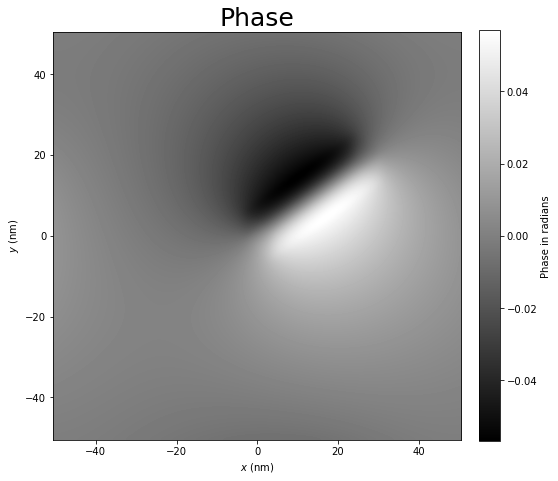

In [397]:
plt.figure(figsize=(8, 8))
plt.title('Phase', fontsize=25)

imgplot1 = plt.imshow(phase.T,origin='lower', extent=[x_begin, x_end, y_begin,y_end], cmap='gray', interpolation='spline16')
#plt.contourf(x_proj,y_proj,phase, cmap='gray', interpolation='spline16')
cbar1 = plt.colorbar(imgplot1, fraction=0.046, pad=0.04)
plt.xlabel("$x$ (nm)")
plt.ylabel("$y$ (nm)")
cbar_lab = cbar1.ax.set_ylabel("Phase in radians")

### Plot cosine of phase

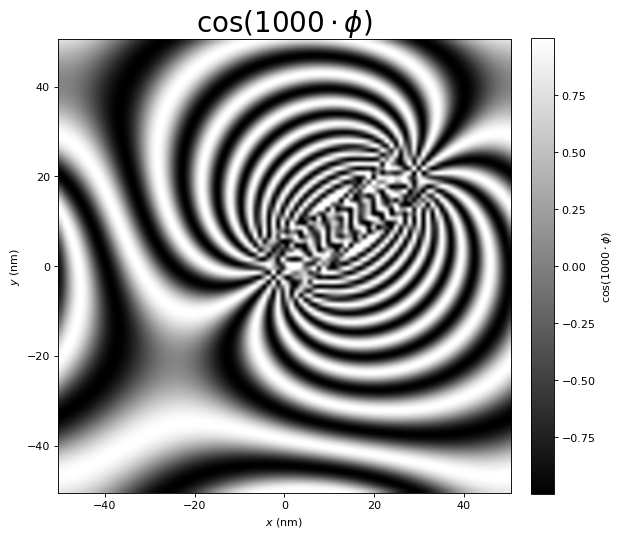

In [398]:
pa = 1e3 # phase amplification factor

#print('The electron beam has a wavlength of %.2E nm.' % λ)

cos_phase = np.cos(pa*phase)
plt.figure(figsize=(8, 8), dpi=80)
plt.title(r'$\cos \left( %g \cdot \phi \right)$' % pa, fontsize=25)
#plt.title(r'$\cos \left( 10 \phi \right)$', fontsize=25)
imgplot3 = plt.imshow(cos_phase.T, origin='lower', extent=[x_begin, x_end, y_begin,y_end],cmap='gray', interpolation='spline16')
#plt.contourf(x_proj,y_proj,cos_phase,cmap='gray', interpolation='spline16')
cbar1 = plt.colorbar(imgplot3, fraction=0.046, pad=0.04)
plt.xlabel("$x$ (nm)")
plt.ylabel("$y$ (nm)")
cbar_lab = cbar1.ax.set_ylabel(r'$\cos \left( %g \cdot \phi  \right)$' % pa)

### Calculate projected B field

In [399]:
d_phase = np.gradient(phase)
b_const = (constants.codata.value('mag. flux quantum')/(constants.nano**2))/(np.pi*z_size)
b_field_x = -b_const*d_phase[0]/y_res
b_field_y = b_const*d_phase[1]/x_res

mag_B = np.hypot(b_field_x,b_field_y)
#mag_B = (1 - np.sqrt(b_field_x**2 + b_field_y**2)/np.max(np.sqrt(b_field_x**2 + b_field_y**2)))

### Plot projected B field

Text(0, 0.5, 'y')

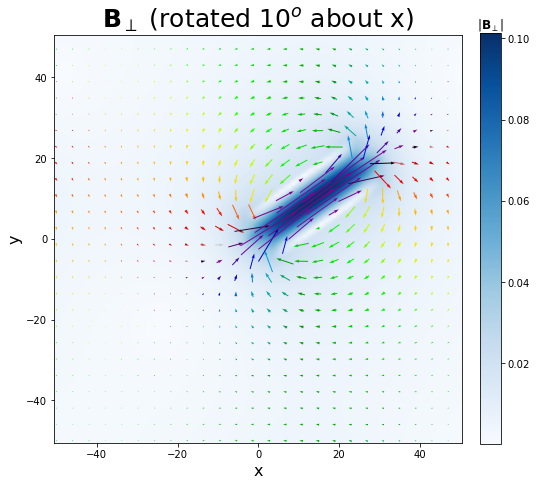

In [400]:
skip_arrow =4
size_arrow = 2

f, ax = plt.subplots(ncols=1, figsize=(8, 8))

pos = ax.imshow(mag_B.T,origin='lower', extent=[x_begin, x_end, y_begin,y_end],interpolation='spline16', cmap='Blues')
#ax.contourf(x_proj,y_proj,mag_B, cmap='Blues')
clb = f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)
clb.ax.set_title(r'|$\bf{B}$$_\perp$|')


plt.quiver(x_proj[::skip_arrow, ::skip_arrow],
           y_proj[::skip_arrow, ::skip_arrow],
           -b_field_y[::skip_arrow, ::skip_arrow], 
           -b_field_x[::skip_arrow, ::skip_arrow], 
           np.arctan2(b_field_x[::skip_arrow, ::skip_arrow], 
                      b_field_y[::skip_arrow, ::skip_arrow]),
          scale = 1/size_arrow, cmap='nipy_spectral', pivot='mid')

ax.set_title(r'$\bf{B}$$_\perp$ (rotated $%i^o$ about x)' % angle, fontsize=25)
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)

## Generate tomography tilt planes
- Given tilt axis values (for either primary or secondary tilt axis), generates planes

Define the function that can calculate z values of a plane

In [380]:
def plane_calculator(xx, yy, tilt, axis_check=0):
    """ Calculate z values of plane defined by given tilt """
    # Convert primary/secondary holder tilts into theta/phi defining plane normal
    # Note theta is azimuth (in xy plane) and phi is polar/zenith angle 

    # check if you have primary or secondary tilted
    if axis_check != 0:
        theta = np.pi/2 # xy angle becomes perpendicular
    else:
        theta = 0

    # phi is deviation from z axis while tilt is devation from xy plane
    # But we want plane normal which is perpendicular:
    if tilt >= 0:
        phi = tilt * 2*np.pi/360
        theta += np.pi # phase change theta to account for 'negative' phi
    elif tilt < 0:
        phi = abs(tilt) * 2*np.pi/360

    # Calculate normal vector using angles
    nx = np.cos(theta) * np.sin(phi)
    ny = np.sin(theta) * np.sin(phi)
    nz = np.cos(phi)
    normal = [nx,ny,nz]

    # Define plane by normal and point (origin)
    point  = np.array([0, 0, 0])
    d = -point.dot(normal)
    z_plane = (d - normal[0] * xx - normal[1] * yy)  / normal[2]
    return z_plane

Plot planes in a tilt series

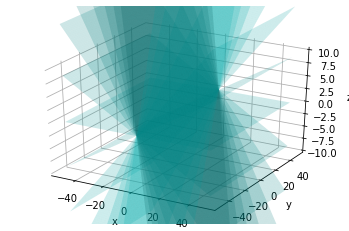

In [381]:
# Generate x,y value
n = 100
xs = np.linspace(-50,50,n)
ys = np.linspace(-50,50,n)
#zs = np.linspace(-50,50,n)
xx, yy = np.meshgrid(xs,ys)

tilts = np.arange(-70,70,10)
plt3d = plt.figure().gca(projection='3d')
axis_check = 1
for tilt in tilts:
    z_plane = plane_calculator(xx,yy,tilt)
    plt3d.plot_surface(xx, yy, z_plane, alpha=0.2, color='c')

ax = plt.gca()
ax.set_zlim([-10,10])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
#ax.grid(False)

## Slice data in a plane???
Currently all from here https://tomroelandts.com/articles/astra-toolbox-tutorial-reconstruction-from-projection-images-part-2
Link to the C++ code for the projection algorithm is here... https://github.com/astra-toolbox/astra-toolbox/blob/master/src/CudaForwardProjectionAlgorithm3D.cpp

In [159]:
import astra

In [160]:
# virtual scan parameters
distance_source_origin = 300  # [mm]
distance_origin_detector = 100  # [mm]
detector_pixel_size = 1.05  # [mm]
detector_rows = 200  # Vertical size of detector [pixels].
detector_cols = 200  # Horizontal size of detector [pixels].
num_of_projections = 3
angles = np.linspace(0, 2 * np.pi, num=num_of_projections, endpoint=False)

In [185]:
# Create phantom
vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                          detector_rows)
phantom = np.zeros((detector_rows, detector_cols, detector_cols))
hb = 110  # Height of beam [pixels].
wb = 40   # Width of beam [pixels].
hc = 100  # Height of cavity in beam [pixels].
wc = 30   # Width of cavity in beam [pixels].
phantom[detector_rows // 2 - hb // 2 : detector_rows // 2 + hb // 2,
        detector_cols // 2 - wb // 2 : detector_cols // 2 + wb // 2,
        detector_cols // 2 - wb // 2 : detector_cols // 2 + wb // 2] = 1
phantom[detector_rows // 2 - hc // 2 : detector_rows // 2 + hc // 2,
        detector_cols // 2 - wc // 2 : detector_cols // 2 + wc // 2,
        detector_cols // 2 - wc // 2 : detector_cols // 2 + wc // 2] = 0
phantom[detector_rows // 2 - 5 :       detector_rows // 2 + 5,
        detector_cols // 2 + wc // 2 : detector_cols // 2 + wb // 2,
       detector_cols // 2 - 5 :       detector_cols // 2 + 5] = 0
phantom_id = astra.data3d.create('-vol', vol_geom, data=phantom)

In [192]:
phantom[0,:,:].shape
Mxx[0,:,:].shape
plt.cla()

In [171]:
x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)
z = np.linspace(-10,10,21)
xs,ys,zs = np.meshgrid(x,y,z)
Mx = np.zeros_like(x)
My = np.zeros_like(y)
Mz = np.zeros_like(z)
Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)
n=21
Mxx[5:15,5:15,5:15] = 1
vol_geom = astra.creators.create_vol_geom(21,21,21)
#phantom = np.array([Mxx,Myy,Mzz])
#phantom.shape
phantom_id = astra.data3d.create('-vol', vol_geom, data=Mxx)

In [ ]:
# plot slice 
from matplotlib import pyplot as plt
plt.imshow(phantom[10,:,:]) # z, x, y planes
#phantom.shape === (200,200,200)

In [57]:
a = np.array(data)
phantom = a[:,-3:]

In [178]:
# create projections
proj_geom = astra.create_proj_geom('cone', 1, 1, detector_rows, detector_cols, angles,
                         (distance_source_origin + distance_origin_detector) / detector_pixel_size, 0)

projections_id, projections =  astra.creators.create_sino3d_gpu(phantom_id, proj_geom, vol_geom)

projections /= np.max(projections) # normalise


In [179]:
# Plot projections
plt.imshow(projections[:,1,:]) # middle value changes projection angle

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

In [128]:
# reconstruct from projections
proj_geom = \
  astra.create_proj_geom('cone', 1, 1, detector_rows, detector_cols, angles,
                         (distance_source_origin + distance_origin_detector) /
                         detector_pixel_size, 0)
projections_id = astra.data3d.create('-sino', proj_geom, projections)

vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                          detector_rows)
reconstruction_id = astra.data3d.create('-vol', vol_geom, data=0)
alg_cfg = astra.astra_dict('FDK_CUDA')
alg_cfg['ProjectionDataId'] = projections_id
alg_cfg['ReconstructionDataId'] = reconstruction_id
algorithm_id = astra.algorithm.create(alg_cfg)
astra.algorithm.run(algorithm_id)
reconstruction = astra.data3d.get(reconstruction_id)


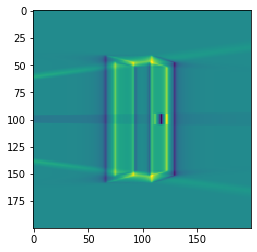

In [135]:
# plot reconstruction
plt.imshow(reconstruction[:,:,100])

## Rotations

In [136]:
from scipy.ndimage.interpolation import rotate as rotate

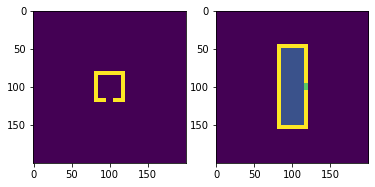

In [193]:
f, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
ax1.imshow(phantom[:,:,100]) # slice z
ax2.imshow(np.average(phantom,axis=2)) # projection

In [149]:
def rotate_3d(data,angle):
    """ Rotate 3D dataset about the x axis, give angle in degrees """
    # Define shape of output
    data_rot = np.zeros((data.shape[0], data.shape[1], data.shape[2]))
    
    # Rotate each slice individually about x axis
    for i in range(data.shape[0]):
        # Rotate
        s = data[i,:,:]
        srot = rotate(s,angle)
        
        # Crop back to original size
        midpoint = srot.shape[0]/2
        srot_crop = srot[round(midpoint-data.shape[1]/2):round(midpoint+data.shape[1]/2),
                         round(midpoint-data.shape[2]/2):round(midpoint+data.shape[2]/2)]
        
        # Store
        data_rot[i,:,:] = srot_crop
    
    return data_rot

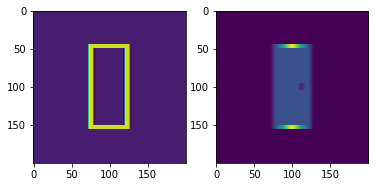

In [192]:
# Try out rotation on phantom
phant_rot = rotate_3d(phantom,45)

# plot rotated
f, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
ax1.imshow(phant_rot[:,:,100]) # slice x
ax2.imshow(np.average(phant_rot,axis=2)) # projection

In [96]:
# Next is to do this but for M vector at each point
# Generate x,y value
n = 100
xs = np.linspace(-50,50,n)
ys = np.linspace(-50,50,n)
zs = np.linspace(-50,50,n)
xx, yy, zz = np.meshgrid(xs,ys, zs)
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

# Generate magnetisation
#Mx = np.zeros_like(xs)
#My = np.zeros_like(ys)
#Mz = np.zeros_like(zs)
#Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)

data = []
for x in xs:
    for y in ys:
        for z in zs:
            if x**2 + y**2 < 25**2 and x**2 + y**2 > 10**2 and z<25 and z>-25:
                m = [1,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])
            else:
                m = [0,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])

Mxx = np.take(data,3,axis=1)
Myy = np.take(data,4,axis=1)
Mzz = np.take(data,5,axis=1)

Mxx = Mxx.reshape(len(xs),len(ys),len(zs))
Myy = Myy.reshape(len(xs),len(ys),len(zs))
Mzz = Mzz.reshape(len(xs),len(ys),len(zs))

m_x, m_y, m_z = Mxx, Myy, Mzz
MX, MY, MZ = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2)
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

# Array with unique z coordinates
xuni = np.unique(coor[:,0])
yuni = np.unique(coor[:,1])
zuni = np.unique(coor[:,2])

# Length of each dimension
x_len = len(xuni)
y_len = len(yuni)
z_len = len(zuni)

# Generate mesh
X, Y, Z = np.meshgrid(xuni, yuni, zuni)

# Calculate grid spacing
x_res = (xuni[1]-xuni[0])
y_res = (yuni[1]-yuni[0])
z_res = (yuni[1]-yuni[0])

# Limits of grid
x_begin = xuni[0] - 0.5*x_res
x_end = xuni[-1] + 0.5*x_res
y_begin = yuni[0] - 0.5*y_res
y_end = yuni[-1] + 0.5*y_res
z_begin = zuni[0] - 0.5*z_res
z_end = zuni[-1] + 0.5*z_res

# Calculate size of grid
x_size = (x_end-x_begin)
y_size = (y_end-y_begin)
z_size = (z_end-z_begin)

In [57]:
#a = np.take(data,3,axis=1)
#b = a.reshape(100,100,100)
c = np.mean(b,axis=2)
max(c.reshape(100**2)) # mean of axis 0 and 1 = 0.44, mean of axis 2 = 0.25

0.25

In [91]:
# 3D unrotated
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
ax.quiver(X[::s,::s,::s], Y[::s,::s,::s], Z[::s,::s,::s], MX[::s,::s,::s], MY[::s,::s,::s], MZ[::s,::s,::s],  normalize=True)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
plt.title('Unrotated')

Text(0.5, 0.92, 'Unrotated')

In [97]:
skip_arrow = 10#1
size_arrow = 0.08#0.04


f, ax = plt.subplots(figsize=(8, 8))
plt.title('Input magnetisation', fontsize=25)
Q = plt.quiver(X[::skip_arrow, ::skip_arrow, 0], 
               Y[::skip_arrow, ::skip_arrow, 0], 
               ave_m_x[::skip_arrow, ::skip_arrow], 
               ave_m_y[::skip_arrow, ::skip_arrow],
               np.arctan2(ave_m_x, ave_m_y),
               scale=1/size_arrow, cmap='Spectral', pivot='mid')

In [177]:
phantom.shape

(200, 200, 200)

In [190]:
phantom2 = np.array(X)

In [191]:
phantom2.shape

(100, 100, 100)

## Rotation which works
Model rotated

In [450]:
# Generate model
x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)
z = np.linspace(-10,10,21)
Mx = np.zeros_like(x)
My = np.ones_like(y)
Mz = np.zeros_like(z)

In [451]:
# Mesh model
X,Y,Z = np.meshgrid(x,y,z)
MX,MY,MZ = np.meshgrid(Mx,My,Mz)

In [452]:
# Project model
mx_avg = np.average(MX,axis=2)
my_avg = np.average(MY,axis=2)

Text(0.5, 1.0, 'M projected through z (original)')

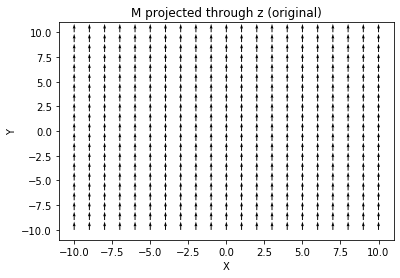

In [453]:
# Plot model
plt.quiver(X[:,:,0],Y[:,:,0],mx_avg,my_avg,scale=40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z (original)')

In [454]:
# Apply rotation
theta = 90 * 2*np.pi/360
rot_dat = []
for i, xx in enumerate(x):
    x0,y0,z0 = xx, y[i], z[i]
    mx, my, mz = Mx[i], My[i], Mz[i]
    
    xr = x0
    yr = np.cos(theta)*y0 - np.sin(theta)*z0
    zr = np.sin(theta)*y0 + np.cos(theta)*z0
    
    mxr = mx
    myr = np.cos(theta)*my - np.sin(theta)*mz
    mzr = np.sin(theta)*my + np.cos(theta)*mz
    rot_dat.append([xr,yr,zr,mxr,myr,mzr])

In [455]:
# Extract data
xrs = np.take(rot_dat,0,axis=1)
yrs = np.take(rot_dat,1,axis=1)
zrs = np.take(rot_dat,2,axis=1)
mxrs = np.take(rot_dat,3,axis=1)
myrs = np.take(rot_dat,4,axis=1)
mzrs = np.take(rot_dat,5,axis=1)

In [456]:
# Reform as grid
Xr,Yr,Zr = np.meshgrid(xrs,yrs,zrs)
MXr,MYr,MZr = np.meshgrid(mxrs,myrs,mzrs)

Text(0.5, 1.0, 'M projected through z (rotated 90 degrees about x)')

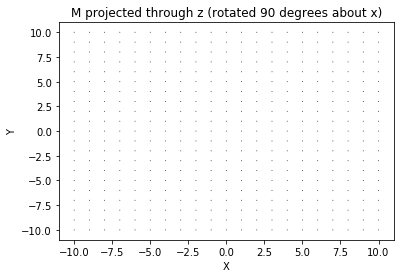

In [457]:
# Plot rotated
plt.quiver(Xr[:,:,0],Yr[:,:,0],MXr[:,:,0],MYr[:,:,0],scale=40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z (rotated %i degrees about x)' % (theta*360*0.5/np.pi))

Gridded data rotated

In [4]:
# Apply rotation
theta = 90 * 2*np.pi/360
rot_dat = []
n = 100
Xflat = X.reshape(n**3)
Yflat = Y.reshape(n**3)
Zflat = Z.reshape(n**3)
MXflat = MX.reshape(n**3)
MYflat = MY.reshape(n**3)
MZflat = MZ.reshape(n**3)
for i, xx in enumerate(Xflat):
    x0,y0,z0 = xx, Yflat[i], Zflat[i]
    mx, my, mz = MXflat[i], MYflat[i], MZflat[i]
    
    xr = x0
    yr = np.cos(theta)*y0 - np.sin(theta)*z0
    zr = np.sin(theta)*y0 + np.cos(theta)*z0
    
    mxr = mx
    myr = np.cos(theta)*my - np.sin(theta)*mz
    mzr = np.sin(theta)*my + np.cos(theta)*mz
    rot_dat.append([xr,yr,zr,mxr,myr,mzr])

In [5]:
# Extract data
xrs = np.take(rot_dat,0,axis=1)
yrs = np.take(rot_dat,1,axis=1)
zrs = np.take(rot_dat,2,axis=1)
mxrs = np.take(rot_dat,3,axis=1)
myrs = np.take(rot_dat,4,axis=1)
mzrs = np.take(rot_dat,5,axis=1)

In [6]:
Xr,Yr,Zr = xrs.reshape(n,n,n),yrs.reshape(n,n,n),zrs.reshape(n,n,n)
MXr,MYr,MZr = mxrs.reshape(n,n,n),myrs.reshape(n,n,n),mzrs.reshape(n,n,n)
# AFTER IT RESHAPES, THE COLUMN ORDER GOES TO Z Y X

In [71]:
# project
# Project model
import sys
np.set_printoptions(threshold=sys.maxsize)
mx_avgr = np.average(MXr,axis=0)
my_avgr = np.average(MYr,axis=0)

mag_B

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0. 

In [83]:
# Plot rotated projection
skip = 10


f, ax = plt.subplots(ncols=1, figsize=(8, 8))
mag_B = (mx_avgr**2 + my_avgr**2)**0.5#np.hypot(mx_avgr,my_avgr)
mag_B = mag_B.T
pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, y_begin, y_end],interpolation='spline16', cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

plt.quiver(Xr[0,::skip,::skip],Yr[0,::skip,::skip],mx_avgr[::skip,::skip],my_avgr[::skip,::skip],scale=6)
#plt.quiver(Xr[::skip,::skip,0],Yr[::skip,::skip,0],mx_avgr,my_avgr,scale=40)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z (rotated %i degrees about x)' % (theta*360*0.5/np.pi))

Text(0.5, 1.0, 'M projected through z (rotated 90 degrees about x)')

In [103]:
# Plot unrotated projection
skip = 10

f, ax = plt.subplots(ncols=1, figsize=(8, 8))
mag_B = np.hypot(ave_m_x,ave_m_y)
pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, y_begin, y_end],interpolation='spline16', cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

plt.quiver(X[::skip,::skip,0],Y[::skip,::skip,0],ave_m_x[::skip,::skip],ave_m_y[::skip,::skip],scale=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z unrotated')





Text(0.5, 1.0, 'M projected through z unrotated')

In [ ]:
# NOTE THAT IT MAY MAKE SENSE THAT SOMETIMES YOU SEE JUST A LINE, NEED TO MAKE SURE PLOTTING THE AVERAGE OTHERWISE IT IS TRUE

In [9]:
# unrotated 3d
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
ax.quiver(X[::s,::s,::s], Y[::s,::s,::s], Z[::s,::s,::s], MX[::s,::s,::s], MY[::s,::s,::s], MZ[::s,::s,::s],  normalize=True)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
plt.title('Unrotated')

Text(0.5, 0.92, 'Unrotated')

In [164]:
# rotated 3d
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
ax.quiver(Xr[::s,::s,::s], Yr[::s,::s,::s], Zr[::s,::s,::s], MXr[::s,::s,::s], MYr[::s,::s,::s], MZr[::s,::s,::s],  normalize=True)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
deg = theta * 360/(2*np.pi)
plt.title('Rotated %i degrees about x' % deg)

Text(0.5, 0.92, 'Rotated 0 degrees about x')

# Astra-based rotation/projection

In [195]:
# PRISTINE
'''
Created on 29 Nov 2018

@author: Rob Tovey
'''
from numpy.linalg import pinv
from numpy import hstack, zeros, array, concatenate, matmul, eye, prod
from scipy.sparse.linalg import LinearOperator
from astra import create_proj_geom, create_vol_geom, create_projector, OpTomo
import atexit
import signal

##################################################
# Astra cleanup


def del_astra(*_, **__):
    try:
        import astra
        astra.data2d.clear()
        astra.data3d.clear()
        astra.projector.clear()
        astra.algorithm.clear()
        astra.matrix.clear()
        astra.functions.clear()
    except Exception:
        pass


atexit.register(del_astra)
signal.signal(signal.SIGTERM, del_astra)
signal.signal(signal.SIGINT, del_astra)
##################################################

# Create projector geometry
def getGeneralProjGeometry(det, beam, e1, e2):
    # beam direction = beam[i]
    # first axis detector is e1[i] (size det[0])
    # second axis detector is e2[i] (size det[1])
    V = hstack((beam, zeros((len(beam), 3)), e2, e1))
    return create_proj_geom('parallel3d_vec', *det, V)

# create volume geometry
def getGeneralVolGeometry(sz):
    return create_vol_geom(sz[1], sz[2], sz[0])

# create projector
def getGeneralProjector(sz, det, beam, e1, e2):
    vol = getGeneralVolGeometry(sz)
    proj = getGeneralProjGeometry(det, beam, e1, e2)
    ID = create_projector('cuda3d', proj, vol)
    return OpTomo(ID)

# define foreward and back projections
class vectorProjector(LinearOperator):

    def __init__(self, proj, dom, ran, vsize=None):
        dim = 3 if proj.appendString[:1] == '3' else 2
        if vsize is None:
            vsize = max(prod(dom[dim:]), prod(ran[dim:]))
        LinearOperator.__init__(self, 'float32', (vsize * prod(ran[:dim]), vsize * prod(dom[:dim])))
        self.proj = proj
        self.dim = dim
        self.dom, self.ran = dom, ran
        self._transpose = self._adjoint

    def FP(self, u):
        u = u.reshape(*self.dom[:self.dim], -1)
        v = [self.proj.FP(u[..., i])[..., None]
             for i in range(u.shape[-1])]
        return concatenate(v, axis=-1).reshape(self.ran)

    def BP(self, u):
        u = u.reshape(*self.ran[:self.dim], -1)
        v = [self.proj.BP(u[..., i])[..., None]
             for i in range(u.shape[-1])]
        return concatenate(v, axis=-1).reshape(self.dom)

    def norm(self):
        # known |R|_2^2 <= min(|R^TR|_1, |R^TR|_inf)
        # |R^TR|_1 = max column sum = max(RR^T * 1)
        # |R^TR|_inf = max row sum = max(R^TR * 1)
        R = self.proj
        normR = [R * (zeros(R.shape[1]) + 1), R.T * (zeros(R.shape[0]) + 1)]
        normR += [R.T * normR[0], R * normR[1]]
        normR = [n.max() ** .5 for n in normR]
        normR = min(normR[0] * normR[1], *normR[2:])

        # Full projector is block diagonal [R,R,...] so same norm
        return normR

    _matvec, _rmatvec = FP, BP


class tensorProjector(LinearOperator):

    def __init__(self, proj, dom, ran, beam):
        P = vectorProjector(proj, dom, ran)
        LinearOperator.__init__(self, 'float32', P.shape)
        self.proj = P
        self.beam = beam
        I = eye(3).reshape(1, 1, 1, 3, 3)
        T = beam.reshape(1, -1, 1, 1, 3) * beam.reshape(1, -1, 1, 3, 1)
        self.orthoProj = I - T
        self._transpose = self._adjoint

    def FP(self, u):
        v = self.proj.FP(u)
        return matmul(self.orthoProj, matmul(v, self.orthoProj))

    def BP(self, u):
        '''
        define <u,v> = \int tr(u(i)v(i))di

        \int tr((P(i)I[u](i)P(i))^T v(i))di
            = \int tr(I[u](i)^T P(i)v(i)P(i))di
            = \int tr(u(j)^T I^T[PvP](j))dj
        '''
        u = matmul(self.orthoProj, matmul(u.reshape(self.proj.ran), self.orthoProj))
        return self.proj.BP(u)

    def norm(self): return self.proj.norm()

    _matvec, _rmatvec = FP, BP


def getVecProj(sz, det, beam, e1, e2, size=(1,)):
    size = tuple(size) if hasattr(size, '__iter__') else (size,)
    proj = getGeneralProjector(sz, det, beam, e1, e2)
    dom = tuple(sz) + size
    ran = (det[0], len(beam), det[1]) + size
    return tensorProjector(proj, dom, ran, beam)


def points2mats(points, values):
    '''
    points[i] = [x_1,x_2,...]
    values[i] = [v_1,v_2,...]
    A[i] is matrix such that
    A[i]x_j \approx v_j, |x_j| = 1

    a_{i,k} x_{j,k} \approx v_{j,i}
    -> AX^T = V -> A^T = X^\dagger V^T
    -> A = VX^{\dagger T}
    '''
    return matmul(array(values), pinv(array(points).T))


def images2coms(images, x, spots, radius):
    '''
    pixel images[i,j,k,l] has coordinates x[k], x[l]
    with a spot near spots[i,m,:2] for each m.
    '''
    X, Y = x[0].reshape(1, -1, 1), x[1].reshape(1, 1, -1)

    out = zeros((images.shape[0], images.shape[1], spots.shape[1], 2))
    for i in range(spots.shape[0]):
        for m in range(spots.shape[1]):
            ind = ((spots[i, m, 0] - X) ** 2 + (spots[i, m, 1] - Y) ** 2 < radius ** 2)
            s = ind.sum()
            out[i, :, m, 0] = (X * ind * images[i, :]).sum(axis=(-2, -1)) / s
            out[i, :, m, 1] = (Y * ind * images[i, :]).sum(axis=(-2, -1)) / s

    return out


def switchDimension(points, e0, e1):
    e0, e1 = e0.reshape(*points.shape[:-1], 3), e1.reshape(*points.shape[:-1], 3)
    if points.shape[-1] == 2:
        return points[..., 0] * e0 + points[..., 1] * e1
    else:
        x = (points * e0).sum(-1) / (e0 * e0).sum(-1)
        y = (points * e1).sum(-1) / (e1 * e1).sum(-1)
        return concatenate([x[..., None], y[..., None]], axis=-1)


if __name__ == '__main__':
    from matplotlib import pyplot as plt
    from numpy import mgrid, random
    n = 1
    # sz = 'real' dimension of volume in pixels
    # det = number of pixels in detector
    sz, det = (50, 70, 90), (n * 100, n * 120)
    e = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    beam = array([e[0], e[1], e[2]])
    e1 = array([e[1], e[0], e[0]]) / n
    e2 = array([e[2], e[2], e[1]]) / n
    sz2 = det[0], len(beam), det[1]

    TEST = 1

    if TEST == 1:  # Check astra has same coordinates
        x, dx = mgrid[:sz[0], :sz[1], :sz[2]], 2 / (min(sz) - 1)
        x = [(xx - xx.mean()) * dx for xx in x]
        y = mgrid[:det[0], :det[1]]
        y = [(yy - yy.mean()) / n * dx for yy in y]

        u = (x[0] < -.5) * (x[1] < .25) * (x[1] > -.5) * (x[2] > .5)

        R = getGeneralProjector(u.shape, det, beam, e1, e2)

        Ru = R.FP(u) #= R * u.reshape(-1)
        for i in range(3):
            plt.subplot(3, 2, 2 * i + 1)
            extent = [[x[j].min(), x[j].max()] for j in range(3) if j != i]
            plt.imshow(u.sum(i), origin='lower', aspect='equal',
                       extent=extent[1] + extent[0])
            plt.title('Manual sum dimension ' + str(i))

            extent = [[yy.min(), yy.max()] for yy in y]
            plt.axis(extent[1] + extent[0])
            plt.subplot(3, 2, 2 * i + 2)
            plt.imshow(Ru[:, i], origin='lower', aspect='equal',
                       extent=extent[1] + extent[0])
            plt.title('Astra sum')
        plt.show()

    elif TEST == 2:  # Check adjoint of tensor map is correct
        size = (3, 3)
        proj = getVecProj(sz, det, beam, e1, e2, size)
        err = zeros(100)
        for i in range(100):
            u = 2 * random.rand(*sz, *size) - 1
            v = 2 * random.rand(*sz2, *size) - 1
            err[i] = (proj.FP(u) * v).sum() - (u * proj.BP(v)).sum()

        err /= ((u ** 2).sum() * (v ** 2).sum()) ** .5
        print('maximum error: %e\nmean error: %e\nstd: %e' % (abs(err).max(), err.mean(), err.std()))


In [463]:
'''
Created on 29 Nov 2018

@author: Rob Tovey - Modified by George Lewis
'''
from numpy.linalg import pinv
from numpy import hstack, zeros, array, concatenate, matmul, eye, prod
from scipy.sparse.linalg import LinearOperator
from astra import create_proj_geom, create_vol_geom, create_projector, OpTomo
import atexit
import signal

##################################################
# Astra cleanup


def del_astra(*_, **__):
    try:
        import astra
        astra.data2d.clear()
        astra.data3d.clear()
        astra.projector.clear()
        astra.algorithm.clear()
        astra.matrix.clear()
        astra.functions.clear()
    except Exception:
        pass


atexit.register(del_astra)
signal.signal(signal.SIGTERM, del_astra)
signal.signal(signal.SIGINT, del_astra)
##################################################

# Create projector geometry
def getGeneralProjGeometry(det, beam, e1, e2):
    # beam direction = beam[i]
    # first axis detector is e1[i] (size det[0])
    # second axis detector is e2[i] (size det[1])
    V = hstack((beam, zeros((len(beam),3)), e2, e1))
    #return create_proj_geom('parallel3d', 1,1,*det, [180,0,0])
    return create_proj_geom('parallel3d_vec', *det, V)

# create volume geometry
def getGeneralVolGeometry(sz):
    return create_vol_geom(sz[1], sz[2], sz[0])

# create projector
def getGeneralProjector(sz, det, beam, e1, e2):
    vol = getGeneralVolGeometry(sz)
    proj = getGeneralProjGeometry(det, beam, e1, e2)
    ID = create_projector('cuda3d', proj, vol)
    return OpTomo(ID)

# define foreward and back projections
class vectorProjector(LinearOperator):

    def __init__(self, proj, dom, ran, vsize=None):
        dim = 3 if proj.appendString[:1] == '3' else 2
        if vsize is None:
            vsize = max(prod(dom[dim:]), prod(ran[dim:]))
        LinearOperator.__init__(self, 'float32', (vsize * prod(ran[:dim]), vsize * prod(dom[:dim])))
        self.proj = proj
        self.dim = dim
        self.dom, self.ran = dom, ran
        self._transpose = self._adjoint

    def FP(self, u):
        u = u.reshape(*self.dom[:self.dim], -1)
        v = [self.proj.FP(u[..., i])[..., None]
             for i in range(u.shape[-1])]
        return concatenate(v, axis=-1).reshape(self.ran)

    def BP(self, u):
        u = u.reshape(*self.ran[:self.dim], -1)
        v = [self.proj.BP(u[..., i])[..., None]
             for i in range(u.shape[-1])]
        return concatenate(v, axis=-1).reshape(self.dom)

    def norm(self):
        # known |R|_2^2 <= min(|R^TR|_1, |R^TR|_inf)
        # |R^TR|_1 = max column sum = max(RR^T * 1)
        # |R^TR|_inf = max row sum = max(R^TR * 1)
        R = self.proj
        normR = [R * (zeros(R.shape[1]) + 1), R.T * (zeros(R.shape[0]) + 1)]
        normR += [R.T * normR[0], R * normR[1]]
        normR = [n.max() ** .5 for n in normR]
        normR = min(normR[0] * normR[1], *normR[2:])

        # Full projector is block diagonal [R,R,...] so same norm
        return normR

    _matvec, _rmatvec = FP, BP


class tensorProjector(LinearOperator):

    def __init__(self, proj, dom, ran, beam):
        P = vectorProjector(proj, dom, ran)
        LinearOperator.__init__(self, 'float32', P.shape)
        self.proj = P
        self.beam = beam
        self._transpose = self._adjoint

    def FP(self, u): return self.proj.FP(u)

    def BP(self, u): return self.proj.BP(u)

    def norm(self): return self.proj.norm()

    _matvec, _rmatvec = FP, BP


def getVecProj(sz, det, beam, e1, e2, size=(1,)):
    size = tuple(size) if hasattr(size, '__iter__') else (size,)
    proj = getGeneralProjector(sz, det, beam, e1, e2)
    dom = tuple(sz) + size
    ran = (det[0], len(beam), det[1]) + size
    # changed this to vector projector
    return tensorProjector(proj, dom, ran, beam)


def points2mats(points, values):
    '''
    points[i] = [x_1,x_2,...]
    values[i] = [v_1,v_2,...]
    A[i] is matrix such that
    A[i]x_j \approx v_j, |x_j| = 1

    a_{i,k} x_{j,k} \approx v_{j,i}
    -> AX^T = V -> A^T = X^\dagger V^T
    -> A = VX^{\dagger T}
    '''
    return matmul(array(values), pinv(array(points).T))


def images2coms(images, x, spots, radius):
    '''
    pixel images[i,j,k,l] has coordinates x[k], x[l]
    with a spot near spots[i,m,:2] for each m.
    '''
    X, Y = x[0].reshape(1, -1, 1), x[1].reshape(1, 1, -1)

    out = zeros((images.shape[0], images.shape[1], spots.shape[1], 2))
    for i in range(spots.shape[0]):
        for m in range(spots.shape[1]):
            ind = ((spots[i, m, 0] - X) ** 2 + (spots[i, m, 1] - Y) ** 2 < radius ** 2)
            s = ind.sum()
            out[i, :, m, 0] = (X * ind * images[i, :]).sum(axis=(-2, -1)) / s
            out[i, :, m, 1] = (Y * ind * images[i, :]).sum(axis=(-2, -1)) / s

    return out


def switchDimension(points, e0, e1):
    e0, e1 = e0.reshape(*points.shape[:-1], 3), e1.reshape(*points.shape[:-1], 3)
    if points.shape[-1] == 2:
        return points[..., 0] * e0 + points[..., 1] * e1
    else:
        x = (points * e0).sum(-1) / (e0 * e0).sum(-1)
        y = (points * e1).sum(-1) / (e1 * e1).sum(-1)
        return concatenate([x[..., None], y[..., None]], axis=-1)


if __name__ == '__main__':
    from matplotlib import pyplot as plt
    from numpy import mgrid, random
    n = 1
    # sz = 'real' dimension of volume in pixels
    # det = number of pixels in detector
    sz, det = (50, 70, 90), (n * 100, n * 120)
    # e is general directions used to define others? 
    e = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    beam = array([e[0], e[1], e[2]])
    # first axis detector is e1[i] (size det[0])
    # second axis detector is e2[i] (size det[1])
    e1 = array([e[1], e[0], e[0]]) / n
    e2 = array([e[2], e[2], e[1]]) / n
    
    sz2 = det[0], len(beam), det[1]

    TEST = 3

    if TEST == 1:  # Check astra has same coordinates
        # make a grid?
        x, dx = mgrid[:sz[0], :sz[1], :sz[2]], 2 / (min(sz) - 1)
        x = [(xx - xx.mean()) * dx for xx in x]
        y = mgrid[:det[0], :det[1]]
        y = [(yy - yy.mean()) / n * dx for yy in y]
        
        # u is a Boolean which returns 1 if all statements are true for each component
        u = (x[0] < -.5) * (x[1] < .25) * (x[1] > -.5) * (x[2] > .5)

        R = getGeneralProjector(u.shape, det, beam, e1, e2)

        Ru = R.FP(u) #= R * u.reshape(-1)
        for i in range(3):
            plt.subplot(3, 2, 2 * i + 1)
            extent = [[x[j].min(), x[j].max()] for j in range(3) if j != i]
            plt.imshow(u.sum(i), origin='lower', aspect='equal',
                       extent=extent[1] + extent[0])
            plt.title('Manual sum dimension ' + str(i))

            extent = [[yy.min(), yy.max()] for yy in y]
            plt.axis(extent[1] + extent[0])
            plt.subplot(3, 2, 2 * i + 2)
            plt.imshow(Ru[:, i], origin='lower', aspect='equal',
                       extent=extent[1] + extent[0])
            plt.title('Astra sum')
        plt.show()

    elif TEST == 2:  # Check adjoint of tensor map is correct
        size = (3, 3)
        proj = getVecProj(sz, det, beam, e1, e2, size)
        err = zeros(100)
        for i in range(100):
            u = 2 * random.rand(*sz, *size) - 1
            v = 2 * random.rand(*sz2, *size) - 1
            err[i] = (proj.FP(u) * v).sum() - (u * proj.BP(v)).sum()

        err /= ((u ** 2).sum() * (v ** 2).sum()) ** .5
        print('maximum error: %e\nmean error: %e\nstd: %e' % (abs(err).max(), err.mean(), err.std()))
        
    elif TEST == 3:
        sz, det = (100, 100, 100), (100, 100)
        # only one vector necessary 'per run', no# of vectors = no of projections
        #(cos(t), sin(t), 0), e1 = (-sin(t), cos(t)
        beam = array([[np.cos(0),np.sin(0),0],[np.cos(np.pi/2),np.sin(np.pi/2),0],[np.cos(np.pi/12),np.sin(np.pi/12),0]])
        e1 = array([[-np.sin(0),np.cos(0),0],[-np.sin(np.pi/2),np.cos(np.pi/2),0],[-np.sin(np.pi/12),np.cos(np.pi/12),0]])
        e2 = array([[0,0,1],[0,0,1],[0,0,1]])
        

        #u = np.array([MX, MY, MZ])[2]
        u = np.concatenate([thing.reshape(*thing.shape[:3],1) for thing in (MX, MY, MZ)], axis=3)
        
        #e1 = [0,1,1]
        R = getVecProj(u.shape[:3], det, beam, e1, e2, 3)
        Ru = R.FP(u)
        
        for i in range(3):
            plt.subplot(3,2,2*i+1)
            plt.imshow(np.mean(u,axis=i))#u.sum(i))
            plt.title('manual sum dimension'+str(i))
            
            plt.subplot(3, 2, 2 * i + 2)
            plt.imshow(Ru[:, i]/100)
            plt.title('Astra sum')
            
        
        


In [525]:
mxf = Ru[:,1,:,0].reshape(100**2)
myf = Ru[:,1,:,1].reshape(100**2)
mzf = Ru[:,1,:,2].reshape(100**2)

Ms = np.array([mxf,myf,mzf])

theta = 90 * np.pi/180
C = np.cos(theta)
S = np.sin(theta)
C = C/np.hypot(C,S)
S = S/np.hypot(C,S)

Msr = []
for i in range(100**2):
    x, y, z = Ms[:,i][0],Ms[:,i][1],Ms[:,i][2]
    xr,yr,zr = x, C*y-S*z, S*y+C*z
    Msr.append([xr,yr,zr])
 
Msr = np.array(Msr)
Mxr = np.take(Msr,0,axis=1)
Myr = np.take(Msr,1,axis=1)
Mzr = np.take(Msr,2,axis=1)

Mxr = Mxr.reshape(100,100)/100
Myr = Myr.reshape(100,100)/100
Mzr = Mzr.reshape(100,100)/100

In [526]:
plt.subplot(3,1,1); plt.imshow(Mxr, vmin=0,vmax=1)
plt.subplot(3,1,2); plt.imshow(Myr, vmin=0,vmax=1)
plt.subplot(3,1,3); plt.imshow(Mzr, vmin=0,vmax=1)

/home/grl31/anaconda3/envs/astraenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.
/home/grl31/anaconda3/envs/astraenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/grl31/anaconda3/envs/astraenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWar

In [469]:
Ru.shape
plt.figure()
for i in range(3):g
    plt.subplot(3,3,i+4); plt.imshow(Ru[:,1,:,i])
    plt.subplot(3,3,i+7); plt.imshow(Ru[:,2,:,i])
Mxr = Ru[:,0,:,0]
Myr = Ru[:,0,:,1]
Mzr = Ru[:,0,:,2]

In [448]:
# beam = array([[np.cos(0),np.sin(0),0],[np.cos(np.pi/2),np.sin(np.pi/2),0],[np.cos(np.pi/12),np.sin(np.pi/12),0]])
# e1 = array([[-np.sin(0),np.cos(0),0],[-np.sin(np.pi/2),np.cos(np.pi/2),0],[-np.sin(np.pi/12),np.cos(np.pi/12),0]])
# e2 = array([[0,0,1],[0,0,1],[0,0,1]])

theta = 0 * np.pi/180
C = np.cos(theta)
S = np.sin(theta)
C = C/np.hypot(C,S)
S = S/np.hypot(C,S)

# 0,1,2 are rotations about x,y,z
beam = array([[0,C,-S],[C,0,S],[C,-S,0]])
e1 =   array([[0,S,C],[0,1,0],[S,C,0]])
e2 =   array([[1,0,0],[-S,0,C],[0,0,1]])


for i in range(3):
    u = np.array([MX, MY, MZ])[i]
    c = 0
    R = getGeneralProjector(u.shape, det, beam, e1, e2)
    Ru = R.FP(u)
    
    if i == 0:
        Mxr = Ru[:, c]/100
    elif i == 1:
        Myr = Ru[:, c]/100
    elif i == 2:
        Mzr = Ru[:, c]/100

In [449]:
# Plot astra projection
s=10
size = 1/10
mag_B = np.hypot(Mxr,Myr)
plt.imshow(mag_B,extent=[-50,50,-50,50],cmap='Blues')
plt.quiver(X[::s,::s,0],Y[::s,::s,0],Mxr[::s,::s],Myr[::s,::s],scale = 1/size)

In [467]:
# Plot original 3D magnetisation
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
size = 4

ax.quiver(X[::s,::s,::s], Y[::s,::s,::s], Z[::s,::s,::s], Mxr[::s,::s,::s], Myr[::s,::s,::s], Mzr[::s,::s,::s],length = size)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
plt.title('Rotated %i degrees about x' % angle)

IndexError: too many indices for array

In [287]:
Ru[:,:].shape

(100, 3, 100)

In [300]:
np.mean(u,axis=2)

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0.

In [288]:
Xflat

KeyboardInterrupt: 